# **Project Name - Cardiovascular Risk Prediction**

##### **Project Type**    - Supervised Machine Learning (Classification)
##### **Contribution**    - Individual

# **Project Summary**

write in 400-500 words here..

# **GitHub Link** 

Paste GitHub Link Here

# **Problem Statement**

**BUSINESS PROBLEM OVERVIEW**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10 year risk of future coronary heart disease(CHD). The dataset provides the patients information. It includes over 4000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

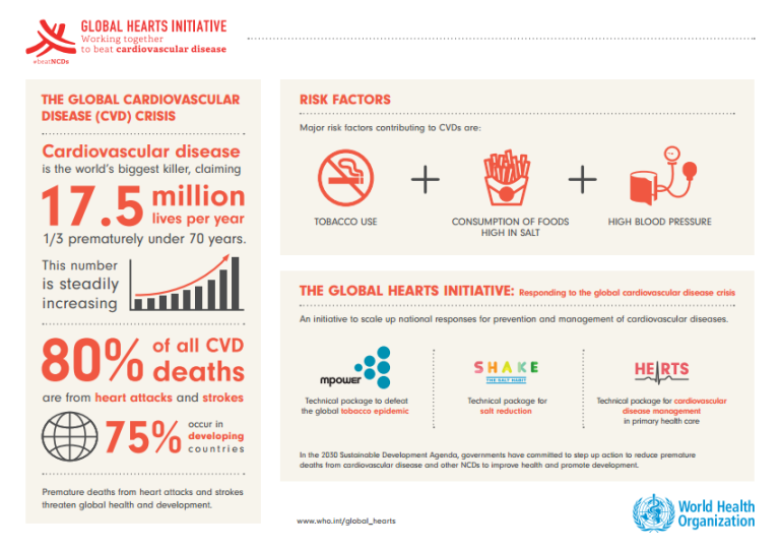

## <b> Data Description </b>

### <b>The dataset is from ongoing cardiovascular study on people of the town Framingham, Massachusetts. The dataset provides the patients information(Sex, Age, is_smoking, cigs_per_day, BP_Meds, Prevalent Stroke, Prevalent hyp, Diabetes, Tot Chol, Sys BP, Dia BP, BMI, Heart Rate)</b>


### <b>Attribute Information: </b>

* #### age - Patient's age.
* #### education - Patient's education.
* #### sex : gender(Male or Female).
* #### is_smoking - currently patient is a smoker or not.
* #### cigsPerDay - Cigarettes smoked per day by patient.
* #### BPMeds - Patient taking BP meds or not.
* #### prevalentStroke - If the patient has the history of stroke.
* #### prevalentHyp - If the patient has the history of hypertention.
* #### diabetes - Patient has diabetes or not.
* #### totChol - Total cholestrol level.
* #### sysBP - Blood Pressure measure.
* #### diaBP - Blood Pressure measure.
* #### BMI - Patient's body mass index.
* #### heartRate - Heart Rate measure.
* #### glucose - Glucose Level.
* #### TenYearCHD - Future 10 year risk of CHD("0" means No and "1" means Yes.)

# ***Let's Begin !***

## Importing Libraries

In [1]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing sklearn libraries
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [3]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Mounting drive and Loading Dataset

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the dataset
working_dir = '/content/drive/MyDrive/Almabetter/Capstone Projects/Cardiovascular Risk Prediction - Anas Malik/dat/'
dataset = pd.read_csv(working_dir + 'data_cardiovascular_risk.csv')

# Data Inspection

## Dataset Rows & Columns

In [ ]:
# Shape of the dataset
dataset.shape

(3390, 17)

## Dataset First View

In [ ]:
# viewing the data of top 5 rows
dataset.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


## Dataset Information

In [ ]:
# dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

## Duplicate Values

In [ ]:
# Duplicate rows in dataset
dataset.duplicated().sum()

0

## Missing Values/Null Values

In [ ]:
# Missing values count
dataset.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

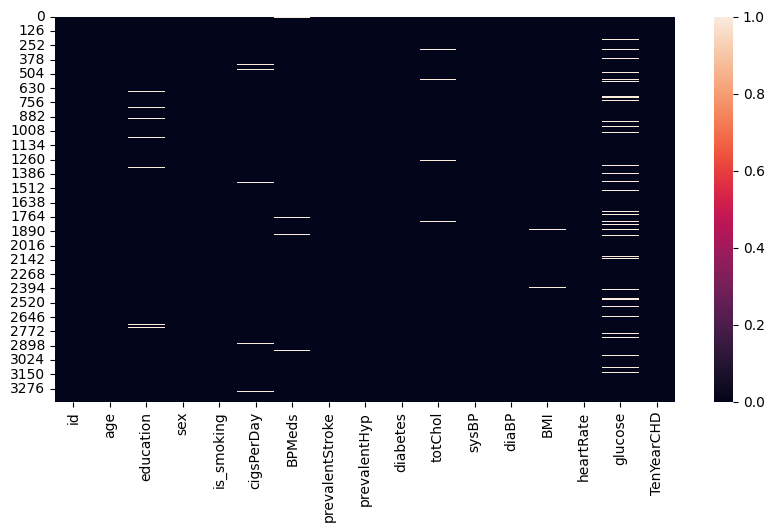

In [ ]:
# Visualizing the null values by plotting heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(dataset.isnull())

## What did I understand about the Dataset ?

The given dataset is a dataset from Framingham, Massachusetts. The dataset contains the patient information. We need to predict whether the patient has a risk of coronary heart disease in future 10 years.

The given dataset has 3390 rows and 17 columns. There are no duplicated entries. There are missing values present in dataset that need to be handle.

## Understanding Variables/Features

In [ ]:
# Columns in the dataset
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Description
dataset.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Features Description

* **age :** Age of the patient(Continuous).
* **education :** Qualifications of the Patient(Continous).
* **sex :** Gender of patient(Categorical).
* **is_smoking :** Currently patient is a smoker or not(Categorical).
* **cigsPerDay :** Number of cigarettes consumed by the patient on daily baisis(Continous).
* **BPMeds :** If patient taking BP Meds or not(Categorical).
* **prevalentStroke :** If patient has history of stroke(Categorical).
* **prevalentHyp :** If the patient has history of hypertention(Categorical).
* **diabetes :** Patient has diabetes or not(Categorical).
* **totChol :** Total cholestrol level of patient(Continuous).
* **sysBP :** Blood pressure measure(Continuous).
* **diaBP :** Blood pressure measure(Continuous).
* **BMI :** Body Mass Index of the patient(Continuous).
* **heartRate :** Heart Rate measure of patient(Continuous).
* **glucose :** Glucose level of patient(Continuous).
* **TenYearCHD :** 10 year risk of CHD(Categorical).

**TenYearCHD is the target variable.**

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print(f"No. of unique values in {i} is {dataset[i].nunique()}")

No. of unique values in id is 3390
No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


# Data Wrangling/Data Cleaning

## Copy of Dataset

In [5]:
# creating a copy of dataset
df = dataset.copy()
df.shape

(3390, 17)

## Dropping Columns

In [6]:
# Dropping id columns
df = df.drop(columns=['id'], axis=1)
df.shape

(3390, 16)

## Handling Missing Values

In [ ]:
# Missing values count
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

There are many null values present in the dataset which need to be treated before feeding to ML algorithmns.

I will fill columns who are numerical in nature with their corresponding mean values and columns who are categorical in nature with their corresponding mode values.

In [7]:
# List of columns names numerical in nature
numerical_cols = ['totChol', 'BMI', 'heartRate', 'glucose']

# List of columns names categorical in nature
categorical_cols = ['education', 'cigsPerDay', 'BPMeds']

In [8]:
# Imputing mean values in numerical columns
for col in numerical_cols:
  df[col].fillna(round(df[col].mean(), 0), inplace=True)

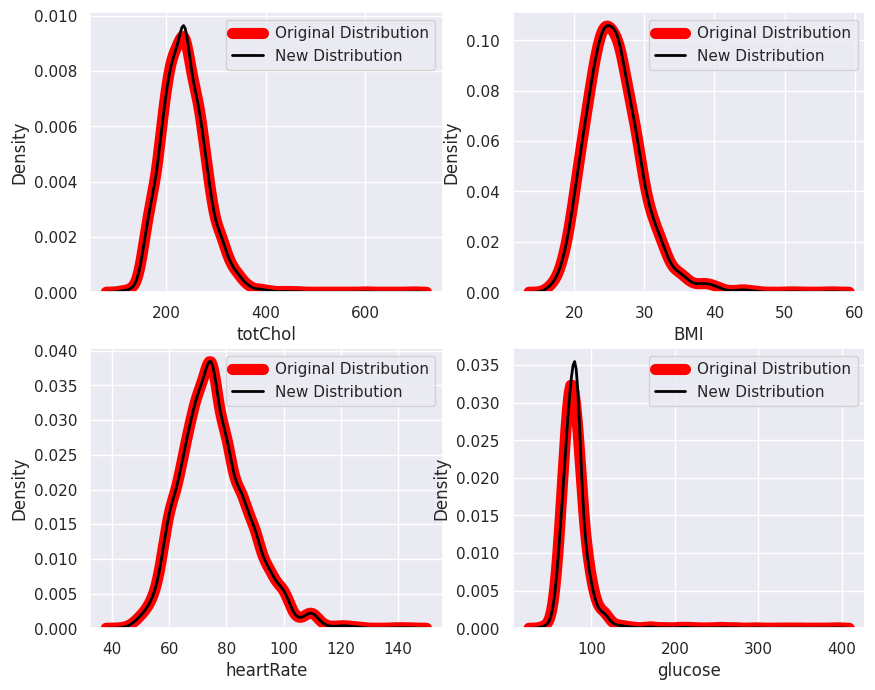

In [ ]:
# Visualizing the distribution
sns.set()
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols):
  plt.subplot(2, 2, i+1)
  sns.distplot(dataset[col], kde_kws={'linewidth': 8, 'color': 'red'}, color='red',  label='Original Distribution', hist=False)
  sns.distplot(df[col], kde_kws={'linewidth': 2, 'color': 'black'}, color='black', label='New Distribution', hist=False)
  plt.legend()
plt.show()

As we can compare the distribution of numerical columns. After imputing null values with their corresponding mean value, the distribution is not changing that much. So we can move forward.

In [9]:
# Imputing mode value in categorical columns
for col in categorical_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

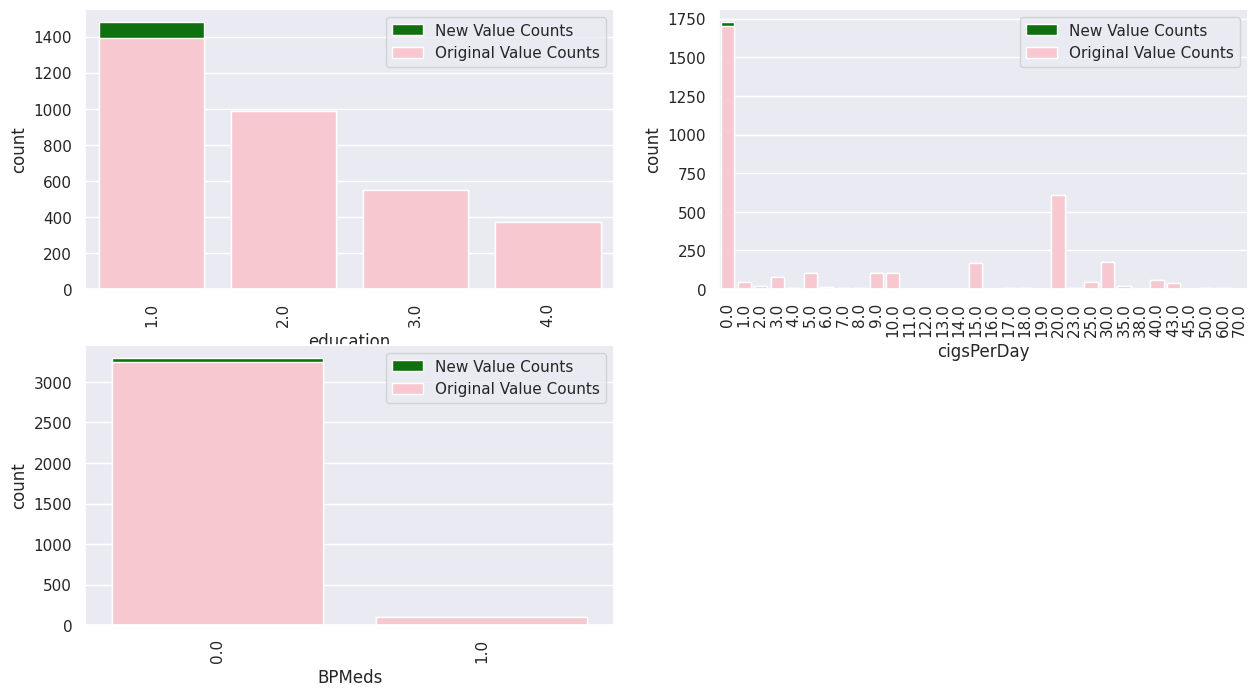

In [ ]:
# Visualizing the unique value counts
sns.set()
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols):
  plt.subplot(2, 2, i+1)
  sns.countplot(x=df[col], color='green', label='New Value Counts')
  sns.countplot(x=dataset[col], color="pink", label='Original Value Counts')
  plt.xticks(rotation='vertical')
  plt.legend()
plt.show()

As we can compare the value counts of categorical columns. After imputing mode value in categorical columns the unique value counts is not changing that much. So we can proceed further. 

In [ ]:
# Missing Value count
df.isnull().sum().sum()

0

<Axes: >

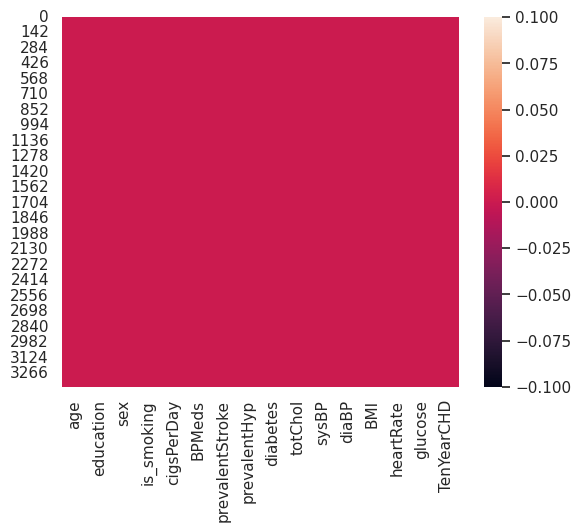

In [ ]:
# Visualizing null values using heatmap
sns.heatmap(df.isnull())

**As we can see, there are no more null values left in the dataset. So we can move forward.**

# Exploratory Data Analysis 

**What is EDA?**

* **Exploratory Data Analysis(EDA), is one of the technique to extract vital features or treds that can be used by machine learning and deep learning models.**

**Why we perform EDA?**

* **We need to perform EDA to get prior understanding of the given dataset before making any assumptions. It also help us to understand the relatioship between dependent and independent variables.**

## Univariate Analysis

**It is a type of analysis where we analyse one variable at one time.**

**We will use following plots to perform univariate analysis.**

* Distribution Plot.
* Box Plot
* Count Plot

In [ ]:
# List of columns numerical in nature
numerical_cols = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# List of columns categorical in nature
categorical_cols = ['education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

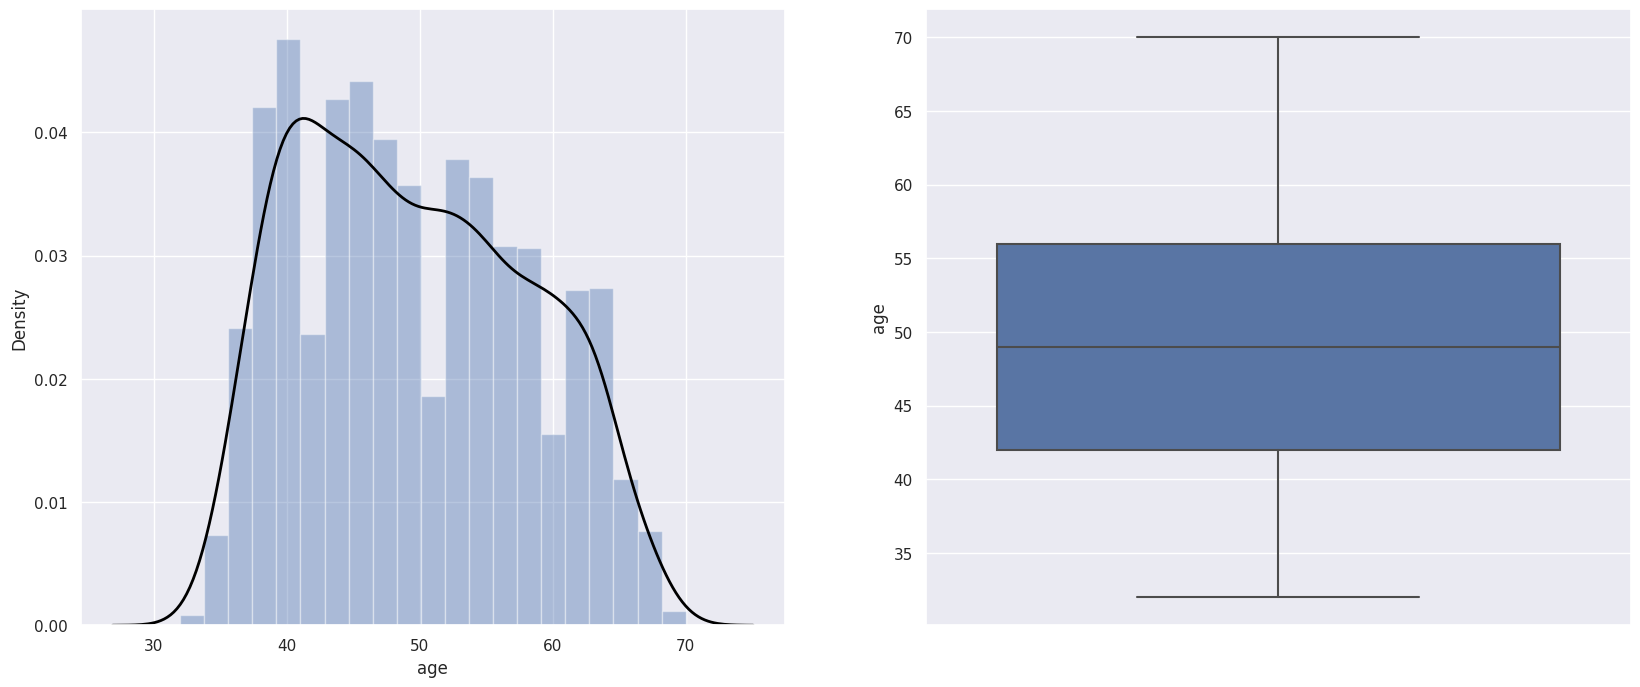

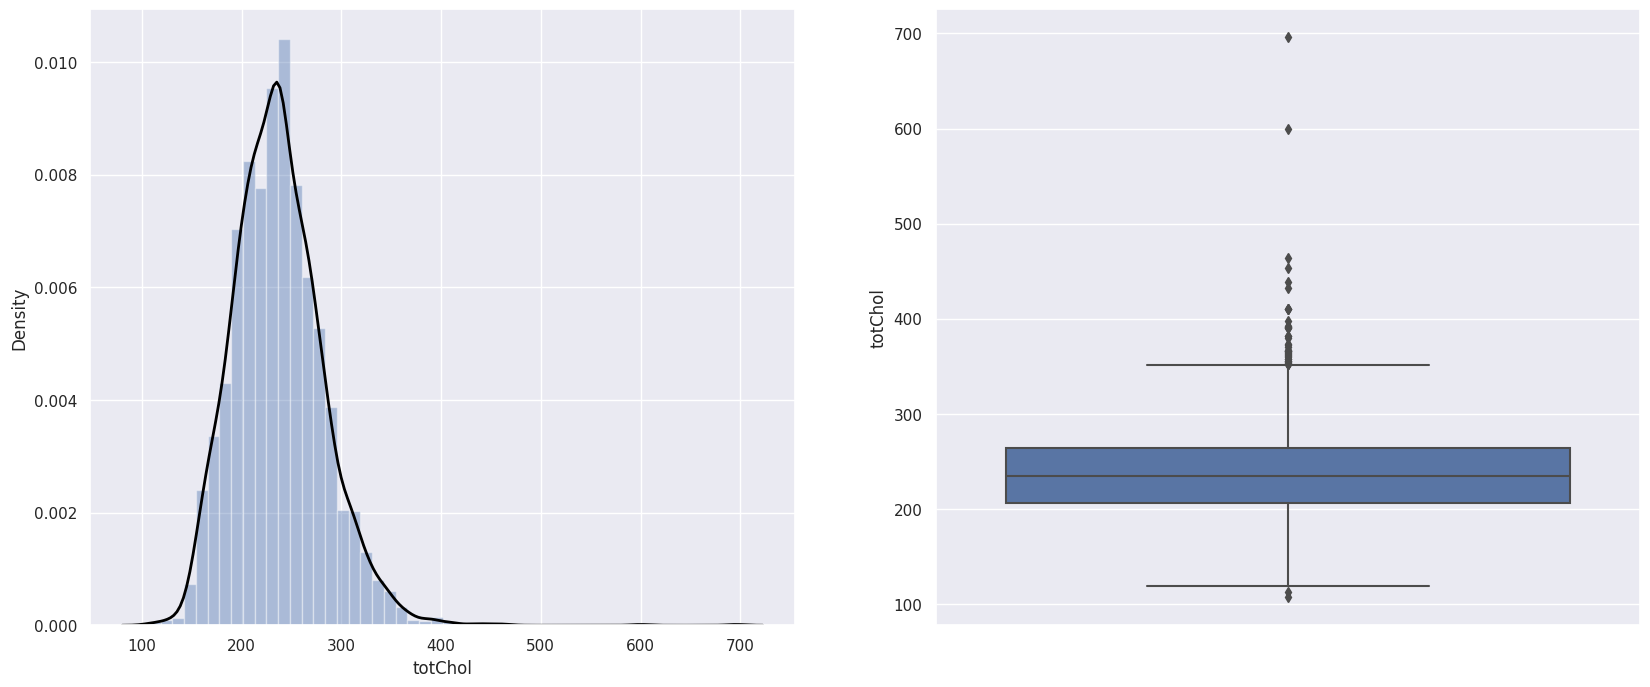

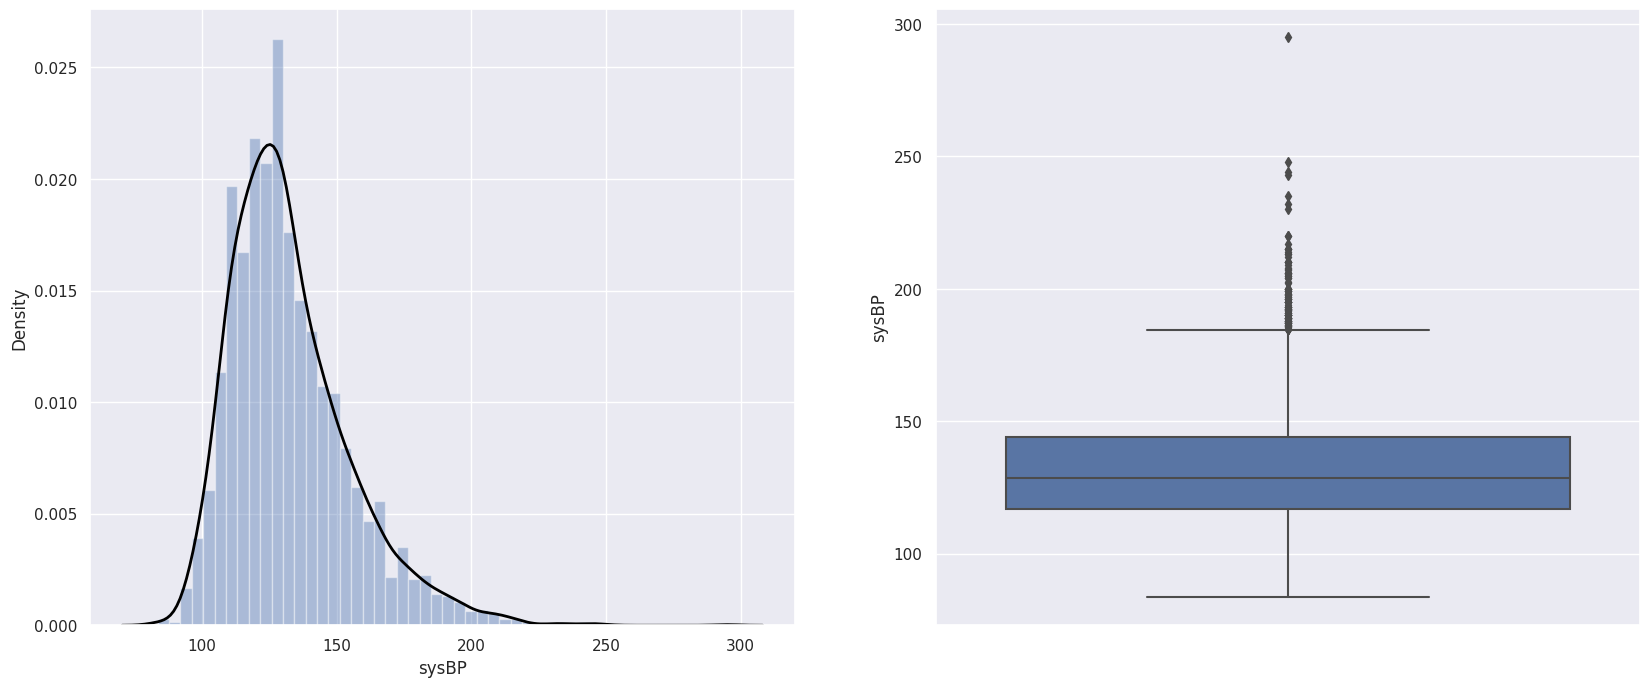

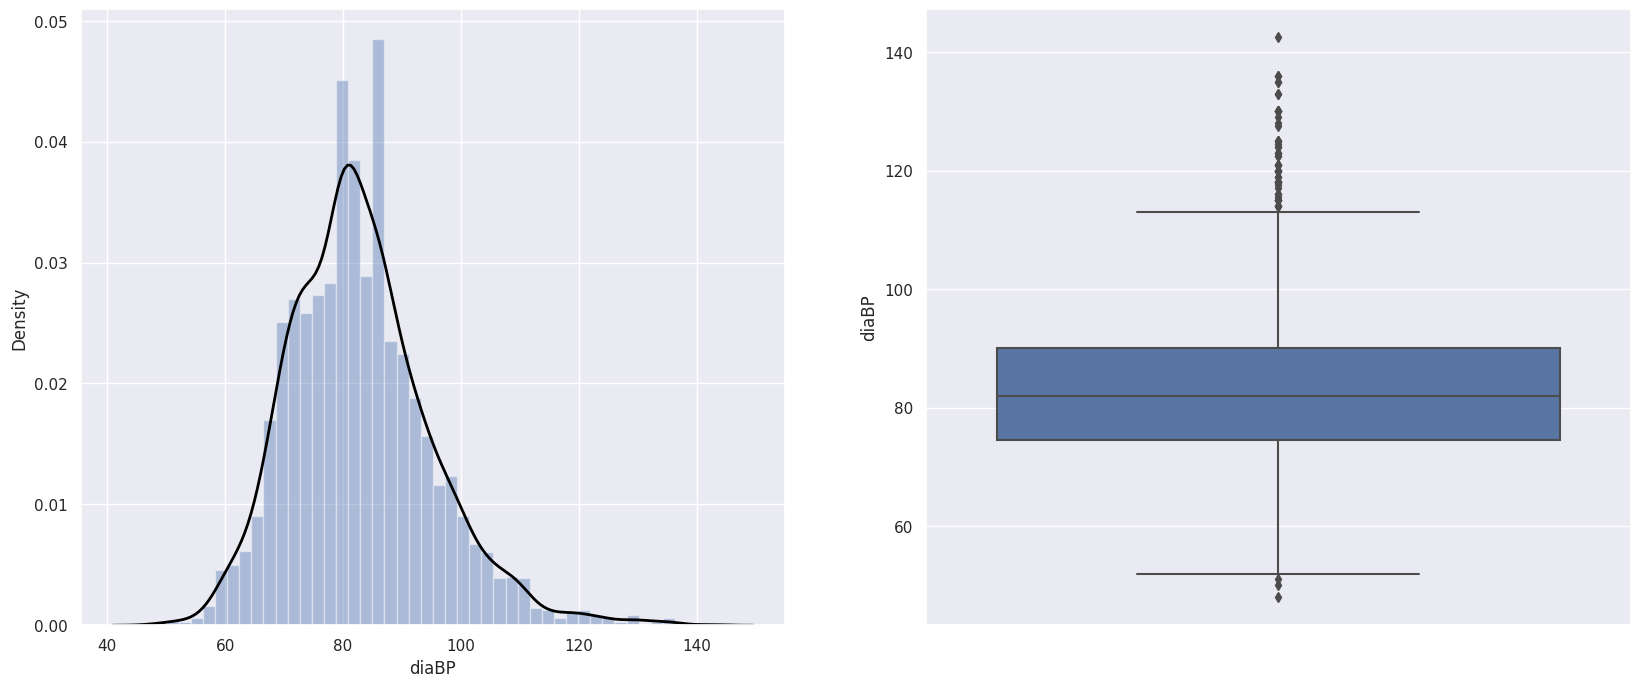

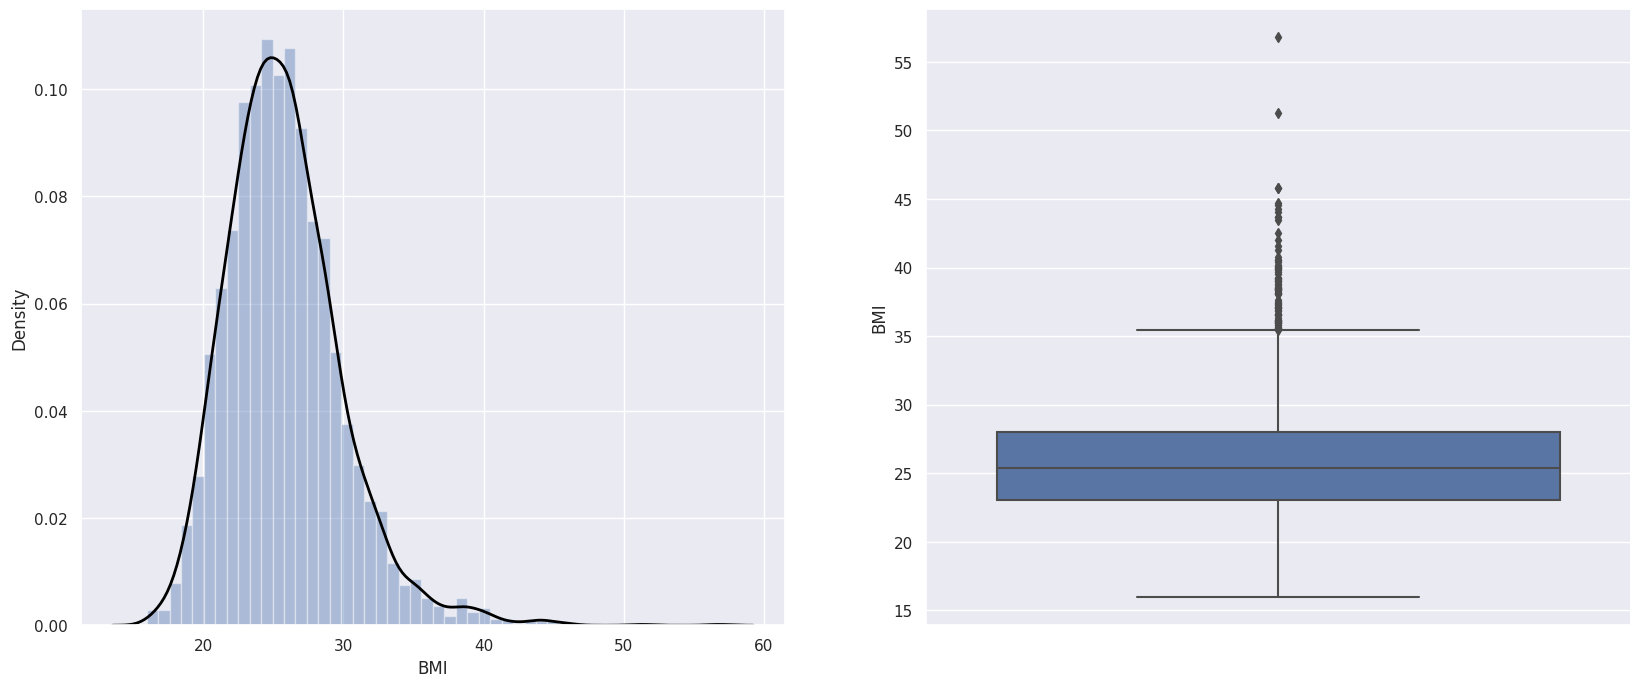

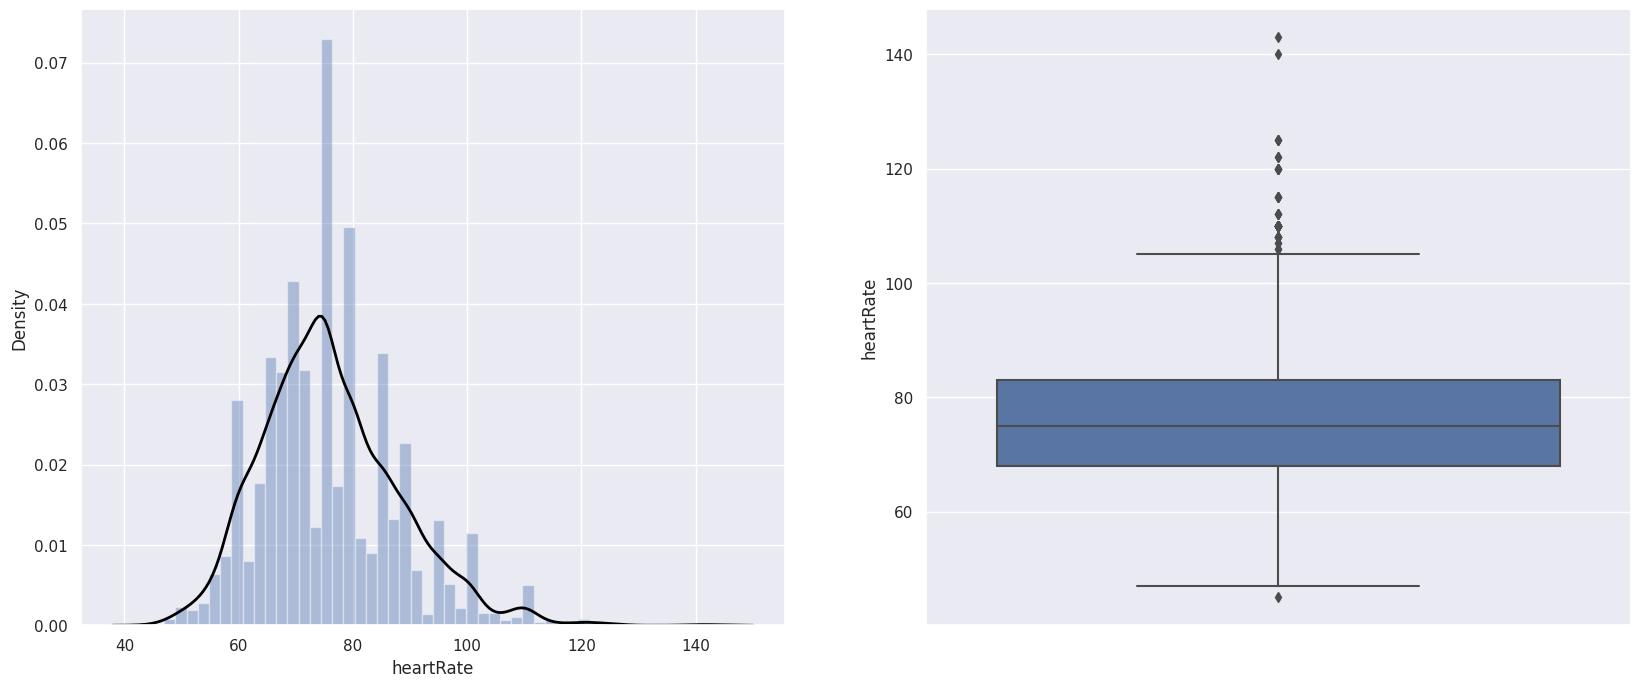

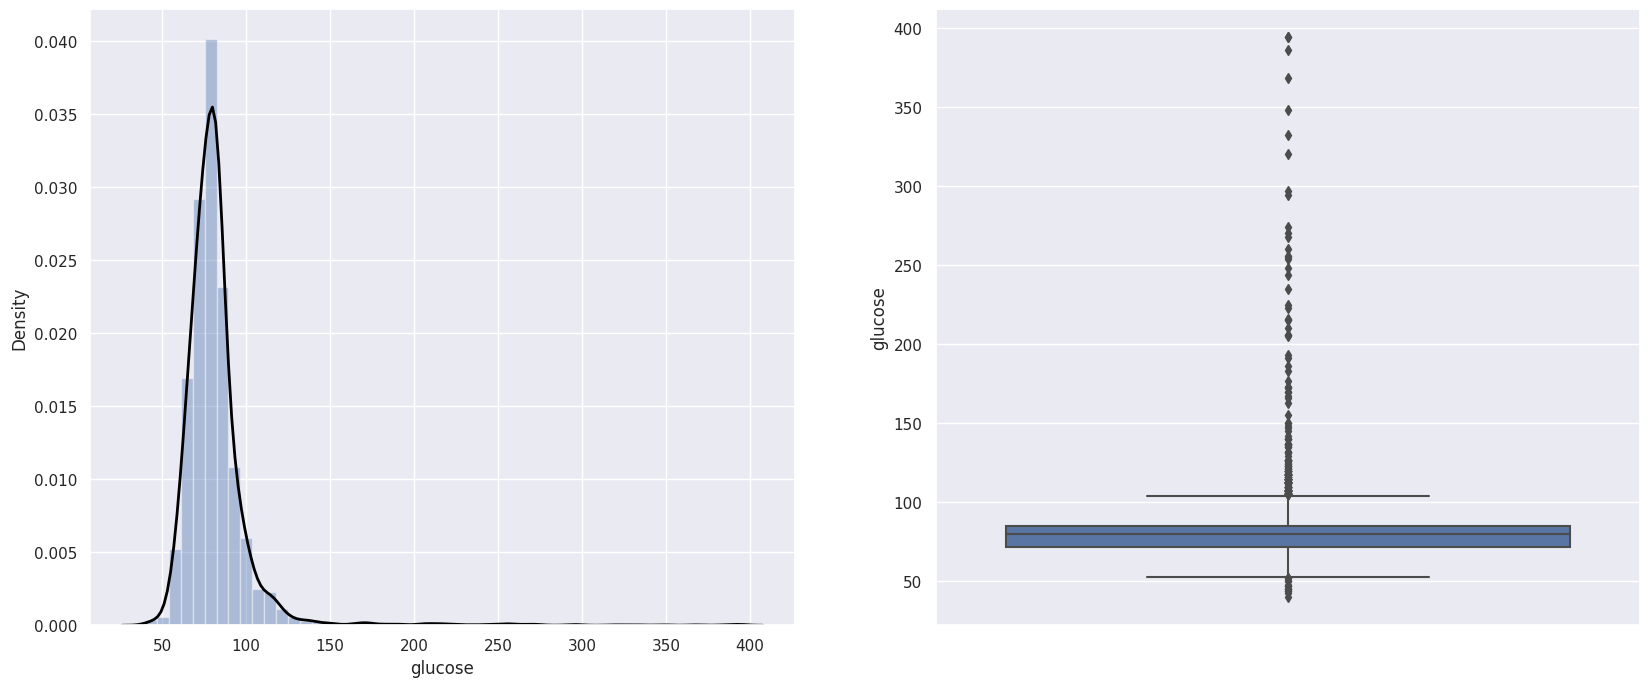

In [ ]:
# visualising the distribution of numerical columns
sns.set()
for col in numerical_cols:
  plt.figure(figsize=(20, 8))
  plt.subplot(1, 2, 1)                                                          # subplot 1
  sns.distplot(df[col], kde_kws={'linewidth': 2, 'color': 'black'}, label=col)  # Distribution plot

  plt.subplot(1, 2, 2)                                                          # Subplot 2
  sns.boxplot(y=df[col])                                                        # Boxplot
plt.show()

**Numerical Columns distribution conclusion :**

* **age :** All the patients have age between 35 to 70 years.
* **totChol :** Majority of the patient's cholestrol level is in between 150 to 350.
* **sysBP :** More number of patients have systolic blood pressure in between 120 to 170.
* **diaBP :** More number of patients have diastolic blood pressure in between 70 to 90.
* **BMI :** Majority of the patients have body mass index in between 20 to 35.
* **heartRate :** Majority of the patients have heart rate in between 70 to 90.
* **glucose :** Majority of the patients have glucose level in between 60 to 100.

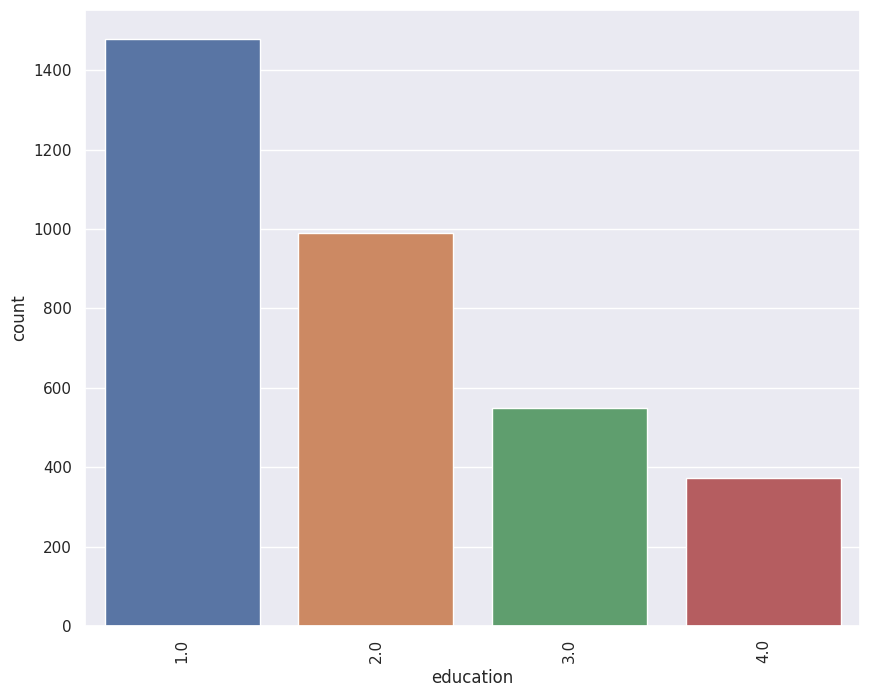

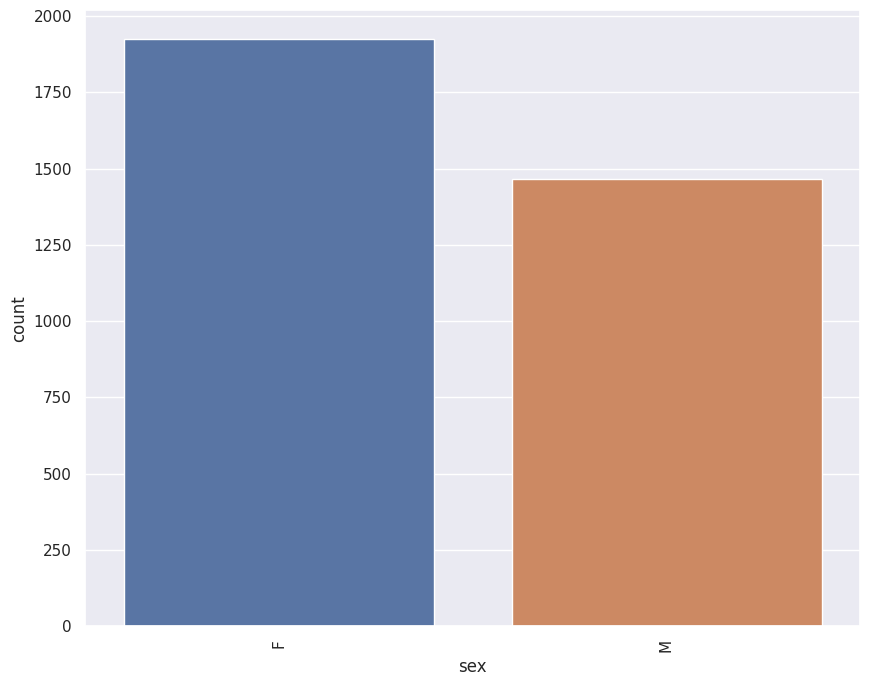

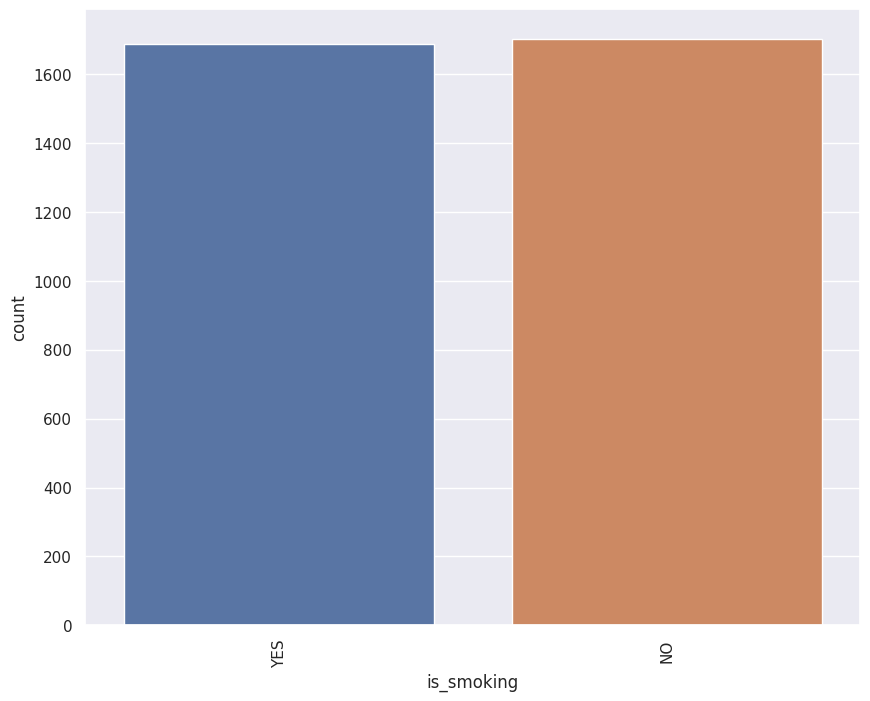

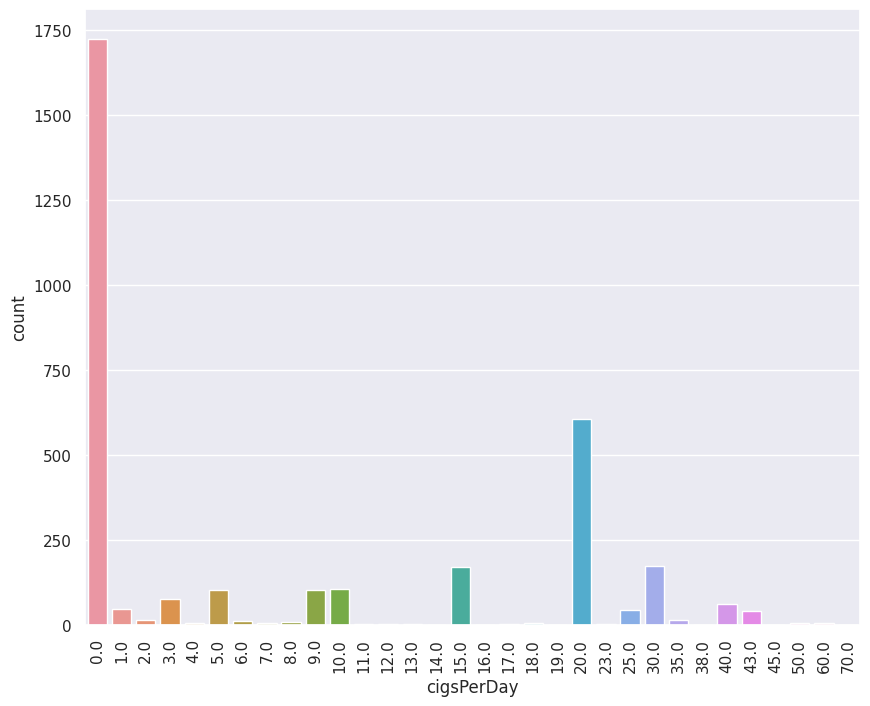

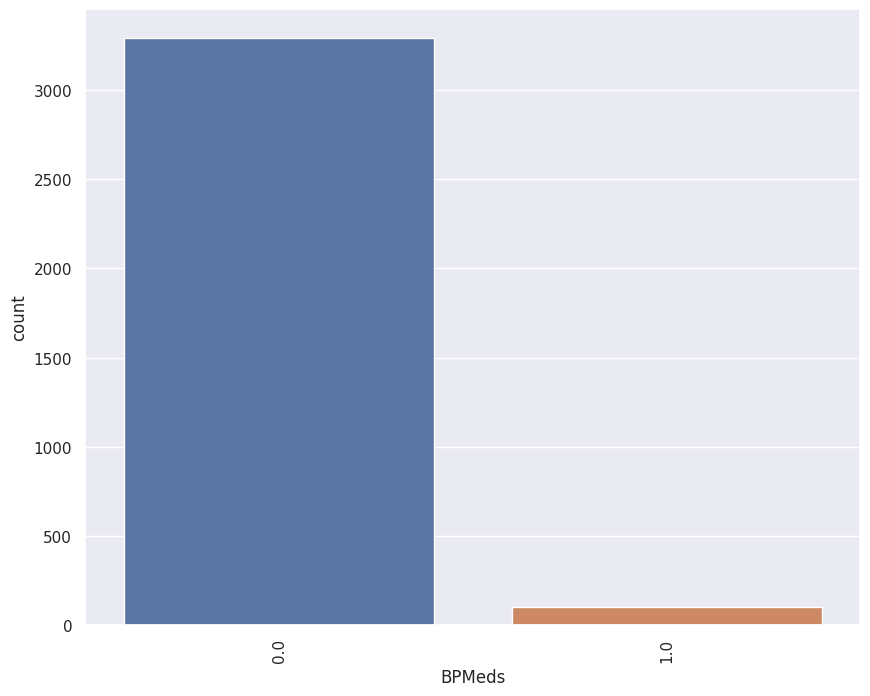

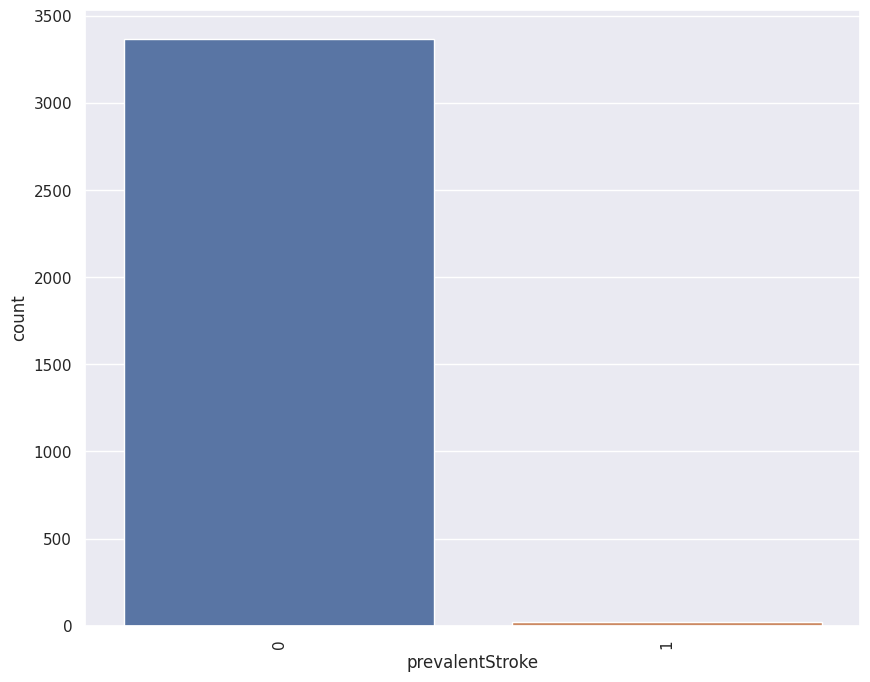

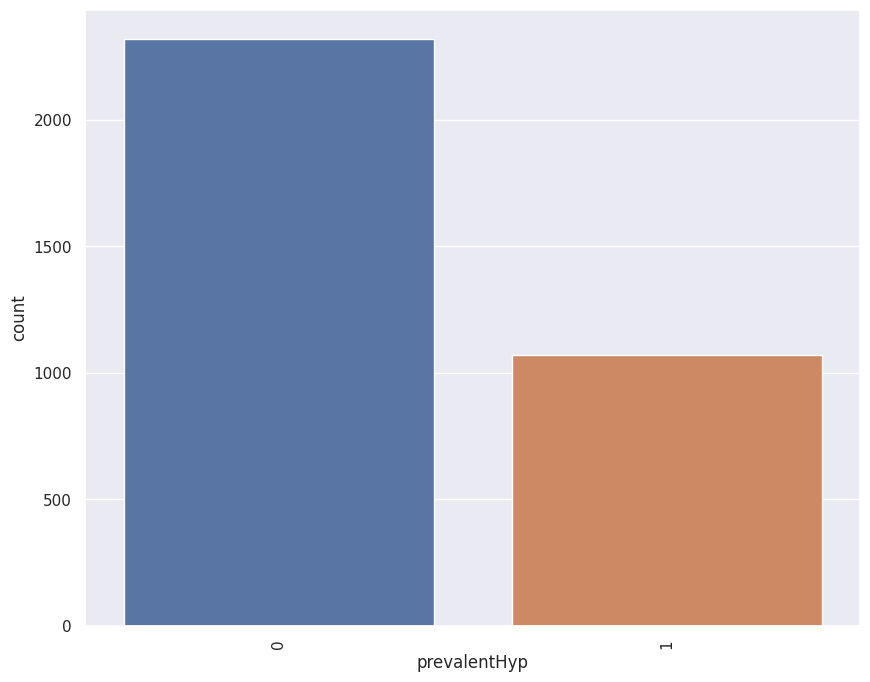

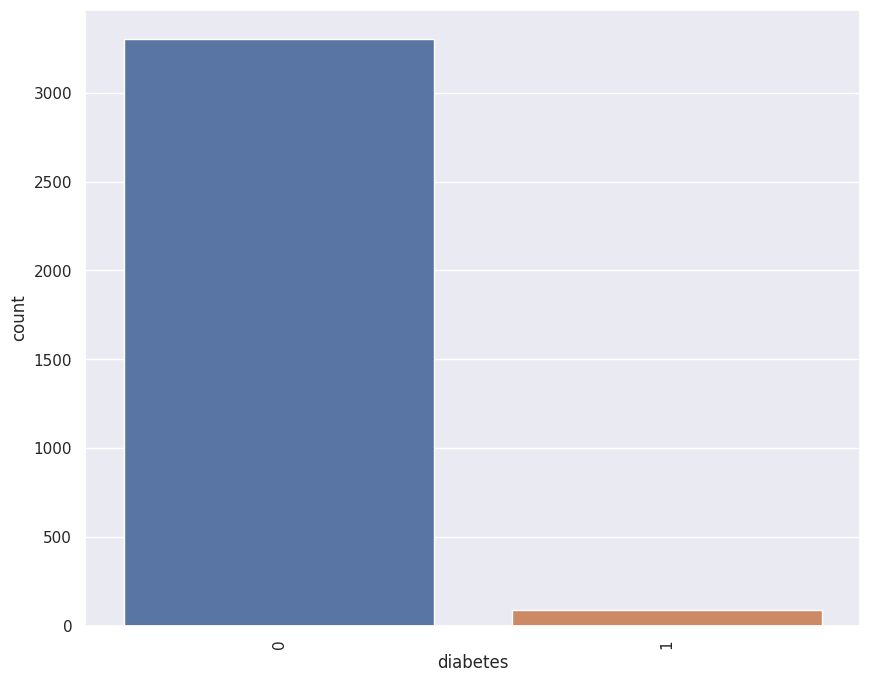

In [ ]:
# visualizing the unique value counts of categorical columns
sns.set()
for col in categorical_cols:
  plt.figure(figsize=(10, 8))
  sns.countplot(x=df[col])
  plt.xticks(rotation='vertical')
plt.show()

**Categorical Columns unique values conclusion :**

* **education :** More number of patients have level 1 education and then followed by level 2, 3 and 4.
* **sex :** Number of female patients are more than male patients.
* **is_smoking :** smoker and non smoker patients are almost equal in number.
* **cigsPerDay :** There are many patients who consume  more than 10 cigarettes per day.
* **BPMeds :** Majority of the patients does not take BP medcines.
* **prevelantStroke :** More number of people doesn't have history of stroke.
* **prevalentHyp :** Patients who does not have any history of hypertension are more in numbers.
* **diabetes :** Majority of the patients does not have diabetes.

## Bivariate Analysis

**It is a type of analysis where we analyse two variables at one time.**

**We will use following plots to perform bivariate analysis :**

* Bar Plot
* Count Plot
* Box Plot
* Point Plot
* Hist Plot

In [62]:
class Bivariate:
  def __init__(self, first_col, second_col, data):
    self.first_col_name = first_col
    self.second_col_name = second_col
    self.data = data
  
  # Barplot Visualization
  def barplot(self, main_title, x_axis_title, y_axis_title):
    dataframe = self.data.groupby(self.first_col_name)[self.second_col_name].sum().reset_index()
    sns.barplot(data=dataframe, x=self.first_col_name, y=self.second_col_name)
    plt.title(main_title, size=20)
    plt.xlabel(x_axis_title, size=15)
    plt.ylabel(y_axis_title, size=15)

  # Countplot visualization
  def countplot(self, main_title, x_axis_title, y_axis_title):
    sns.countplot(data=self.data, x=self.first_col_name, hue=self.second_col_name)
    plt.title(main_title, size=20)
    plt.xlabel(x_axis_title, size=15)
    plt.ylabel(y_axis_title, size=15)
    plt.legend(['No Risk', 'Risk'])

  # Pointplot Visualization
  def pointplot(self, main_title, x_axis_title, y_axis_title):
    sns.pointplot(data=self.data, x=self.second_col_name, y=self.first_col_name)
    plt.title(main_title, size=20)
    plt.xlabel(x_axis_title, size=15)
    plt.ylabel(y_axis_title, size=15)

  # Boxplot Visualization
  def boxplot(self, main_title, x_axis_title, y_axis_title):
    sns.boxplot(data=self.data, x=self.second_col_name, y=self.first_col_name)
    plt.title(main_title, size=20)
    plt.xlabel(x_axis_title, size=15)
    plt.ylabel(y_axis_title, size=15)
    plt.legend(['No Risk', 'Risk'])

  # Histplot Visualization
  def histplot(self, main_title, x_axis_title, y_axis_title):
    sns.histplot(data=self.data, x=self.first_col_name, hue=self.second_col_name)
    plt.title(main_title, size=20)
    plt.xlabel(x_axis_title, size=15)
    plt.ylabel(y_axis_title, size=15)
    plt.legend(['No Risk', 'Risk'])

**Which age group are more at risk of coronary heart disease ?**

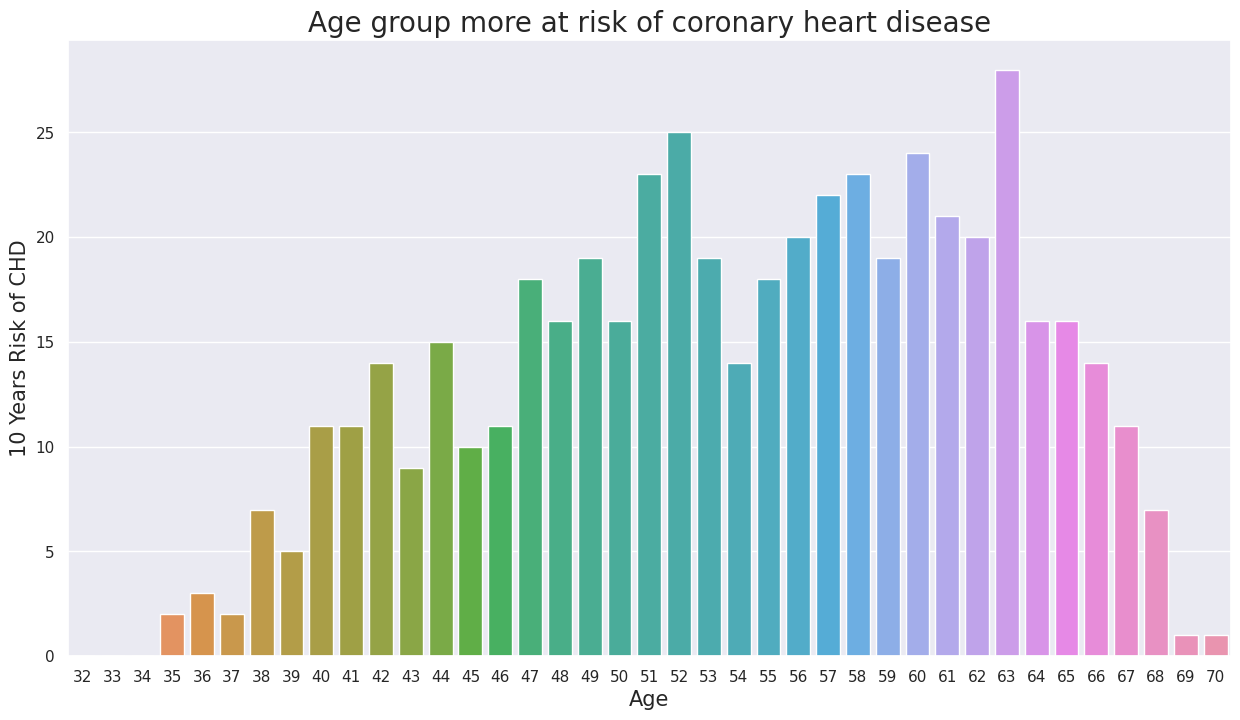

In [ ]:
# Instantiating the class
age = Bivariate(first_col='age', second_col='TenYearCHD', data=df)

# setting the size of figure
plt.figure(figsize=(15, 8))

# visualizing barplot to analyse age group more at risk of CHD
title = "Age group more at risk of coronary heart disease"
x_axis = "Age"
y_axis = "10 Years Risk of CHD"
age.barplot(title, x_axis, y_axis)

**People having the age in between 40 to 65 are more at risk of coronary heart disease in near 10 years. The reason behind can be following :**

****
* **These age group people are less involved in physical activites like playing any sport, gym and more.**
* **The body becomes weak in this age group and a weak body is a sign that the person will mostly be infected by any disease.**
* **Not follwoing a proper diet can be an another reason behind it.**
****

**Which gender is more at risk of coronary heart disease ?**

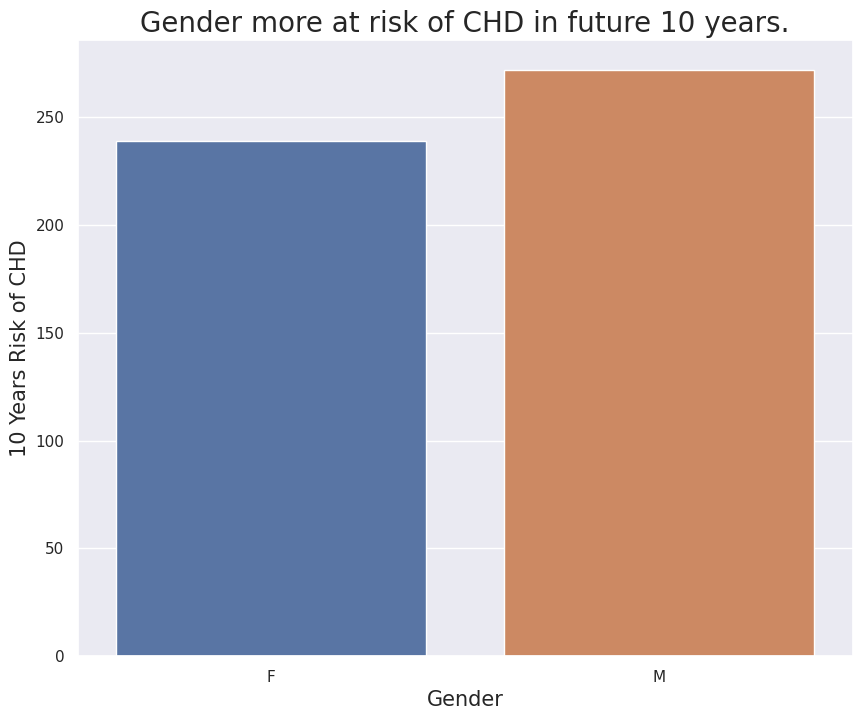

In [ ]:
# Instantiating the class
gender = Bivariate(first_col='sex', second_col='TenYearCHD', data=df)

# setting up the figure size
plt.figure(figsize=(10, 8))

# visualizing barplot to analyse which gender is more at risk
title = "Gender more at risk of CHD in future 10 years."
x_axis = "Gender"
y_axis = "10 Years Risk of CHD"
gender.barplot(title, x_axis, y_axis)

**Male patients are more at risk of coronary heart disease in future 10 years. There can be following reasons :**

****
* **Males are more tends to smoke and take more stress which results in diabetes and hypertension.**
* **Males are less concious about their health as compared to females.**
****

**Does smoking affects the risk of coronary heart disease ?**

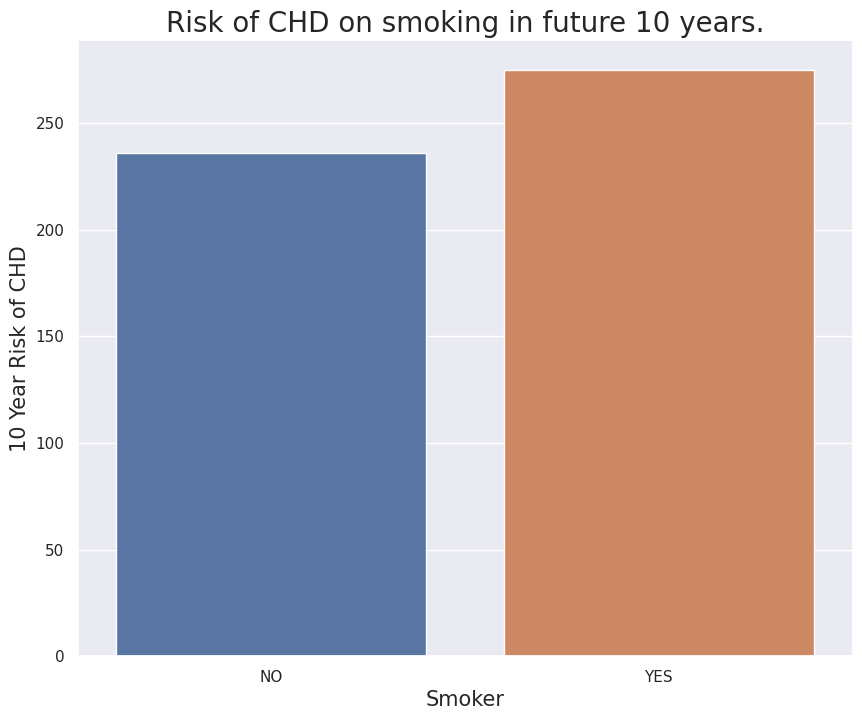

In [ ]:
# Instantiating the class
smoker = Bivariate(first_col='is_smoking', second_col='TenYearCHD', data=df)

# Setting up the figure size
plt.figure(figsize=(10, 8))

# Visualizing barplot to analyse smoking affect
title = "Risk of CHD on smoking in future 10 years."
x_axis = "Smoker"
y_axis = "10 Year Risk of CHD"
smoker.barplot(title, x_axis, y_axis)

****
**People who smoke are more likely to get affected by coronary heart disease as we can see from graph that smoking increses the chance of coronary heart disease.**
****

**What is the role of education in the risk of coronary heart disease in future 10 years ?**

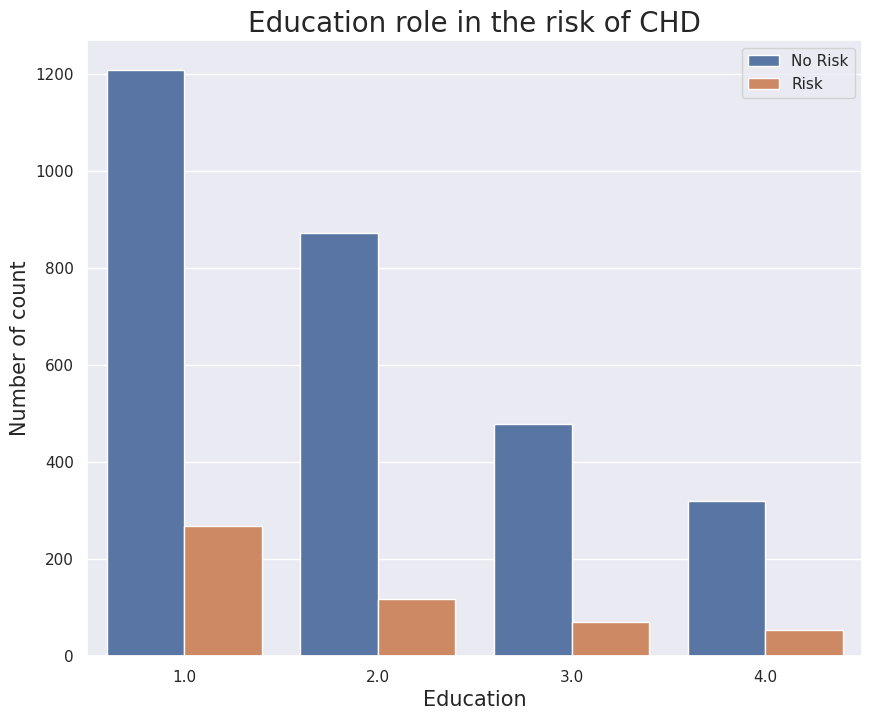

In [ ]:
# Instantiating the class
education = Bivariate(first_col='education', second_col='TenYearCHD', data=df)

# setting up the figuresize
plt.figure(figsize=(10, 8))

# visualizing countplot to analyse education role
title = 'Education role in the risk of CHD'
x_axis = 'Education'
y_axis = 'Number of count'
education.countplot(title, x_axis, y_axis)

****
**As we can see all the level of education have almost equal number of proportion of risk of CHD which is not differentiable. Hence, we can conclude that education does not play any role in the risk of coronary heart disease.**
****

**What is the role of Blood Pressure in the risk of CHD ?**

**1. Analysing if taking BP Medicines increases the chances of coronary heart disease.**

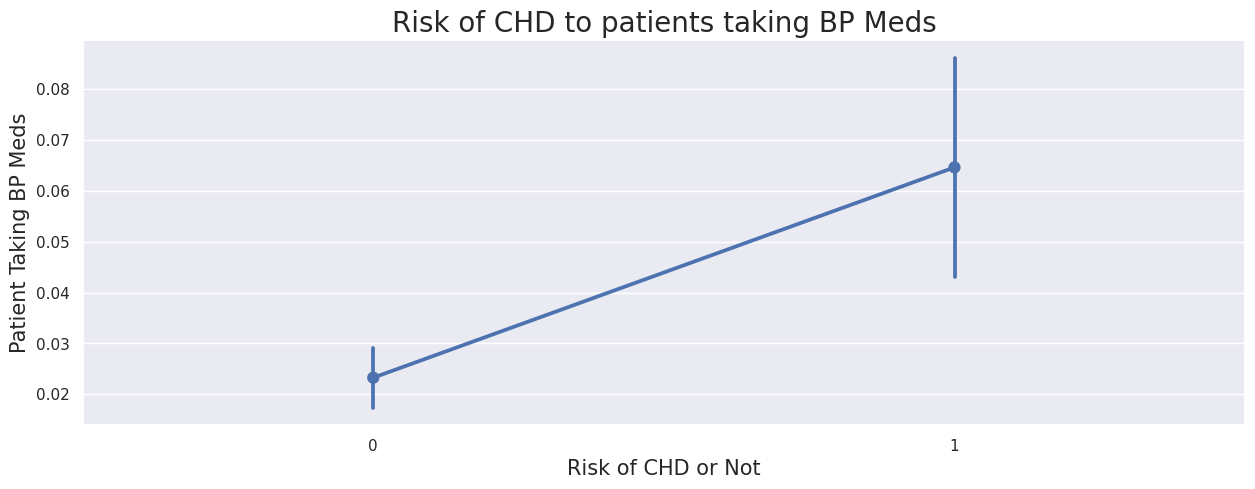

In [ ]:
# Instantiating the class
bp_meds = Bivariate(data=df, first_col='BPMeds', second_col='TenYearCHD')

# Setting up the figure size
plt.figure(figsize=(15, 5))

# visualizing pointplot to analyse the role of Blood Pressure
title = 'Risk of CHD to patients taking BP Meds'
x_axis = 'Risk of CHD or Not'
y_axis = 'Patient Taking BP Meds'
bp_meds.pointplot(title, x_axis, y_axis)

**As we can see, the chances of infected by coronary heart disease increses if a parson is a patient of blood pressure and taking medicines for it.**

**2. Analysing relation of coronary heart disease with diastolic bool pressure.**

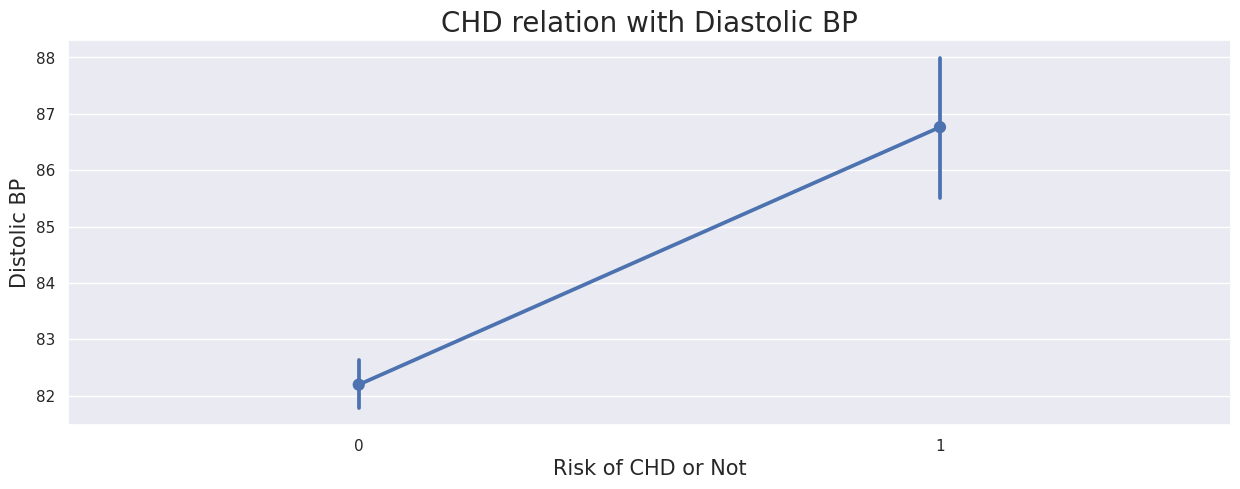

In [ ]:
# Instantiating the class
dia_bp = Bivariate(data=df, first_col='diaBP', second_col='TenYearCHD')

# Setting up the figure size
plt.figure(figsize=(15, 5))

# visualizing pointplot to analyse the role of Blood Pressure
title = 'CHD relation with Diastolic BP'
x_axis = 'Risk of CHD or Not'
y_axis = 'Distolic BP'
dia_bp.pointplot(title, x_axis, y_axis)

**There is a positive correlation. Therefore, more the diastolic blood pressure , more chances of the risk of coronary heart disease.**

**3. Analysing relation of coronary heart disease with systolic bool pressure.**

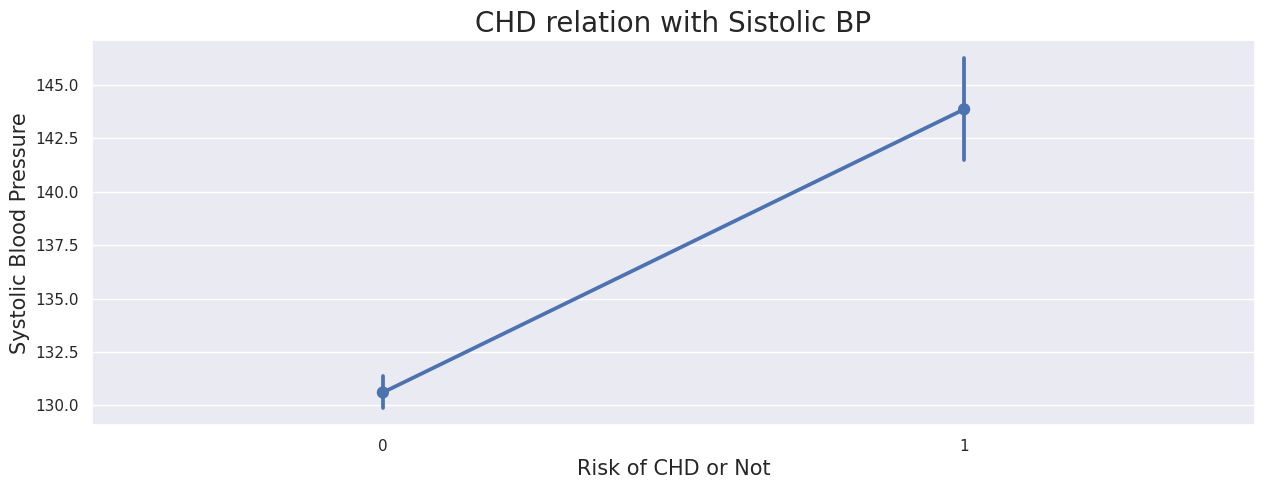

In [ ]:
# Instantiating the class
sys_bp = Bivariate(data=df, first_col='sysBP', second_col='TenYearCHD')

# Setting up the figure size
plt.figure(figsize=(15, 5))

# visualizing pointplot to analyse the role of Blood Pressure
title = 'CHD relation with Sistolic BP'
x_axis = 'Risk of CHD or Not'
y_axis = 'Systolic Blood Pressure'
sys_bp.pointplot(title, x_axis, y_axis)

****
**There is also a positive correlation. Therefore, more the Sistolic blood pressure , more chances of the risk of coronary heart disease.**

**So we can colclude that Blood Pressure is an very important factor to predict the risk of coronary heart disease.**
****

**Which Body Mass index has more risk of coronary heart disease ?**

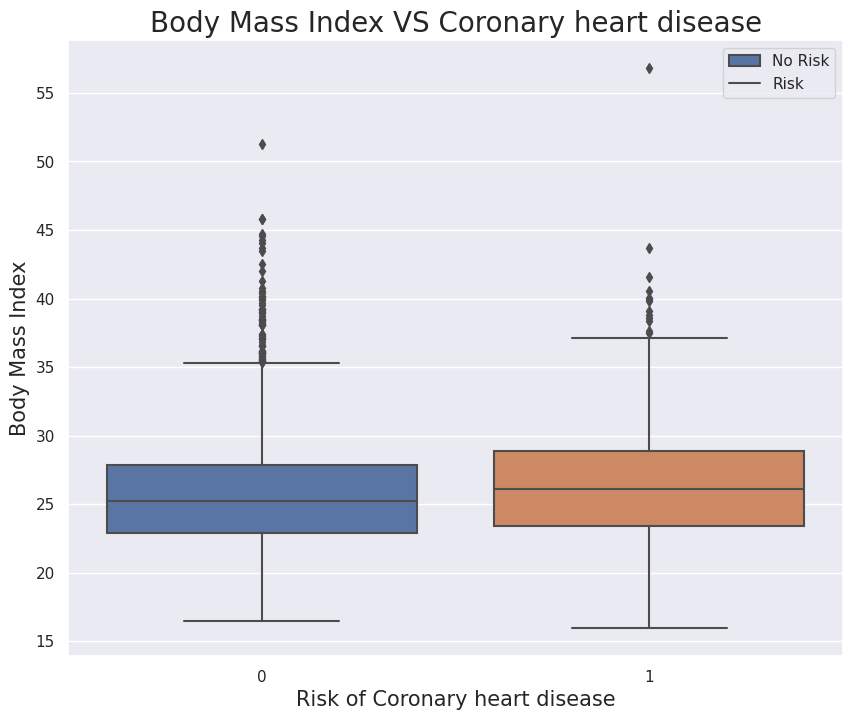

In [ ]:
# Instantiating the class
bmi = Bivariate(data=df, first_col='BMI', second_col='TenYearCHD')

# Setting the figure size
plt.figure(figsize=(10, 8))

# visualizing the boxplot
title = "Body Mass Index VS Coronary heart disease"
x_axis = 'Risk of Coronary heart disease'
y_axis = 'Body Mass Index'
bmi.boxplot(title, x_axis, y_axis)

****
**As we can clearly see that the risk of coronary heart disease is more if the a person have high body mass index.**

**It is also clear from an study that BMI greater than 30Kg/$m^{2}$, is an established risk factor for developing coronary heart disease in a person.**
****

**How heart rate is related to coronary heart disease ?**

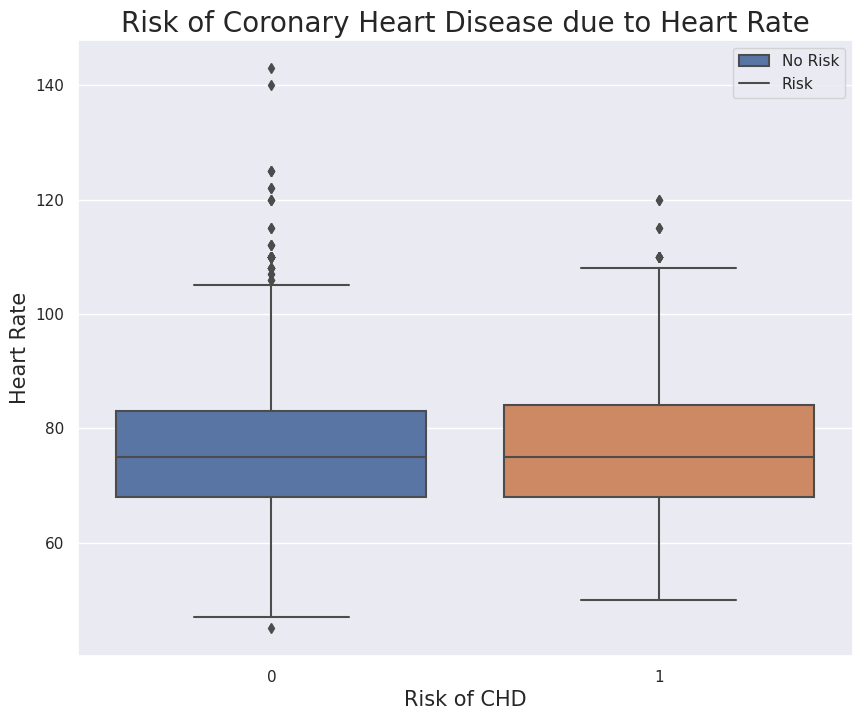

In [18]:
# Instantiating the class
heart_rate = Bivariate(first_col='heartRate', second_col='TenYearCHD', data=df)

# setting up the figure size
plt.figure(figsize=(10, 8))

# Visualizing the boxplot
title = 'Risk of Coronary Heart Disease due to Heart Rate'
x_axis = 'Risk of CHD'
y_axis = 'Heart Rate'
heart_rate.boxplot(title, x_axis, y_axis)

****
**Heart Rate is actually a predictor of cardiovascular disease. As we can see, there are more risk of coronary heart disease with higher heart rate.**

**So we can conclude that, higher the heart rate, more will be the risk of coronary heart disease.**
****

**How glucose level is related to coronary heart disease ?**

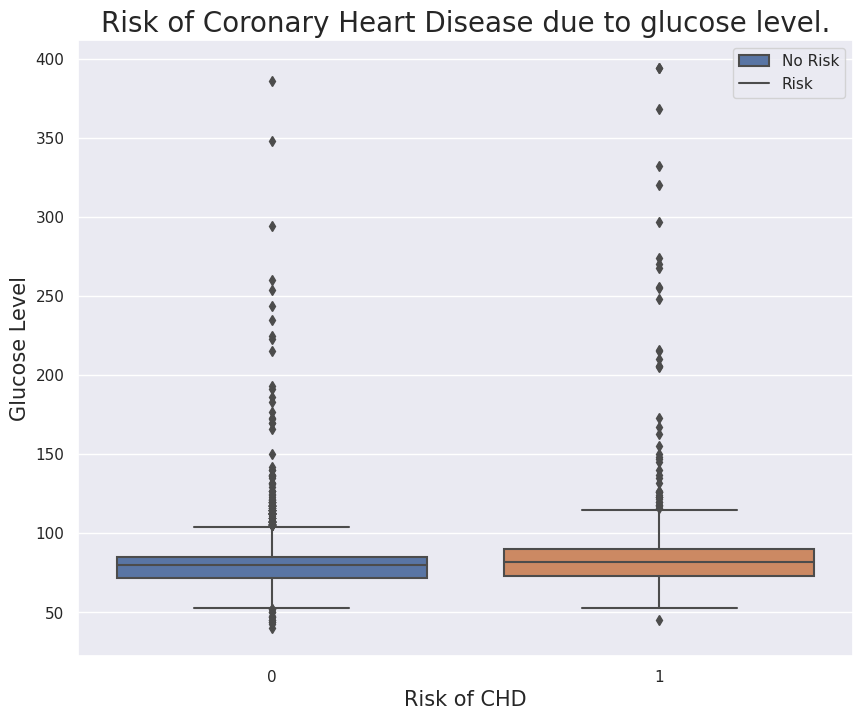

In [19]:
# Instantiating the class
glucose_level = Bivariate(data=df, first_col='glucose', second_col='TenYearCHD')

# Setting up the figure size
plt.figure(figsize=(10, 8))

# Visualizing boxplot to understand the relation
title = "Risk of Coronary Heart Disease due to glucose level."
x_axis = 'Risk of CHD'
y_axis = 'Glucose Level'
glucose_level.boxplot(title, x_axis, y_axis)

****
**High Level of glucose is a symbol of sugar and high blood sugar can damage our blood vessels and nervous system that control our heart.**

**Therefore, we can conclude that if the glucose level is high then it can be a major concern or a risk of coronary heart disease.**
****

**How Cholestrol Level is related to the risk of coronary heart disease ?**

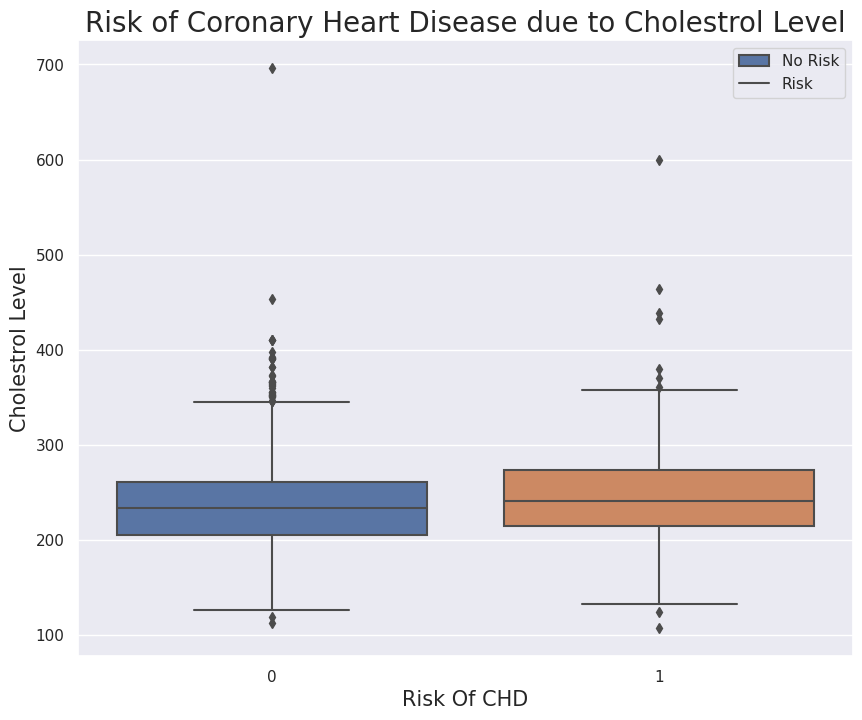

In [28]:
# Instantiating the class
cholestrol = Bivariate(data=df, first_col='totChol', second_col='TenYearCHD')

# setting up the figure size
plt.figure(figsize=(10, 8))

# visualizing the boxplot
title = 'Risk of Coronary Heart Disease due to Cholestrol Level'
x_axis = "Risk Of CHD"
y_axis = "Cholestrol Level"
cholestrol.boxplot(title, x_axis, y_axis)

****
**High Cholestrol Level can lead to the coronary heart disease where our coronary arteries become narrow or even blocked and may lead to coronary heart disease.**

**As we can see that high cholestrol level means more risk to coronary heart disease. Therefore we can conlude that high cholestrol level is a risk factor of coronary heart disease.**
****

**Do a person having a history of hypertention have a risk of coronary heart disease ?**

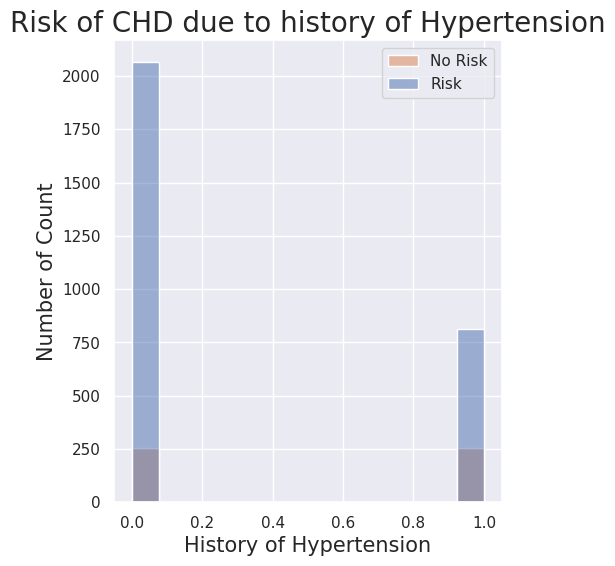

In [64]:
# Instantiating the class
prev_hyp = Bivariate(data=df, first_col='prevalentHyp', second_col='TenYearCHD')

# setting up the figure size
plt.figure(figsize=(5, 6))

# visualizing histogram plot
title = 'Risk of CHD due to history of Hypertension'
x_axis = 'History of Hypertension'
y_axis = 'Number of Count'
prev_hyp.histplot(title, x_axis, y_axis)

****
**Hypertension disrupts the endothelial system which increases the risk of coronary artery disease and peripheral arterial disease.**

**So, we can conclude that if a person have a history of hypertension then risk of coronary heart disease increses.**
****

**Do a person having a history of Stroke have a risk of coronary heart disease ?**

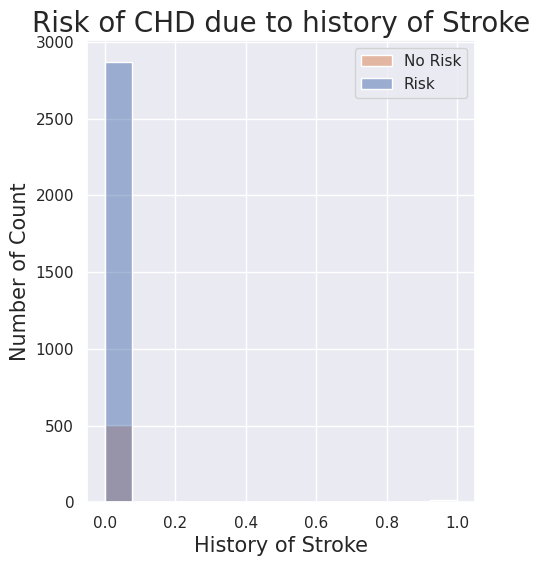

In [74]:
# Instantiating the class
prev_hyp = Bivariate(data=df, first_col='prevalentStroke', second_col='TenYearCHD')

# setting up the figure size
plt.figure(figsize=(5, 6))

# visualizing histogram plot
title = 'Risk of CHD due to history of Stroke'
x_axis = 'History of Stroke'
y_axis = 'Number of Count'
prev_hyp.histplot(title, x_axis, y_axis)

****
**As we can see there is imbalance of class so we cannot predict about the history of stroke as a risk factor of coronary heart disease with the given dataset.**
****

# Multivariate Analysis